In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load dataset
file_path = "./Dataset/AAPL_DATA.csv"  # Update with your file path if needed
data = pd.read_csv(file_path)

In [5]:
# Display first few rows
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         Date    Open    High     Low   Close     Volume
0  2024-06-14  213.85  215.17  211.30  212.49   70122748
1  2024-06-17  213.37  218.95  212.72  216.67   93728300
2  2024-06-18  217.59  218.63  213.00  214.29   79943254
3  2024-06-20  213.93  214.24  208.85  209.68   86172451
4  2024-06-21  210.39  211.89  207.11  207.49  246421353


In [6]:
# Data Preprocessing
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())
# Fill or drop missing values if needed
data = data.dropna()


Checking for missing values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [7]:
# Convert 'Date' column to datetime and encode it
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Encoded'] = data['Date'].map(lambda x: x.toordinal())  # Encode Date to numeric

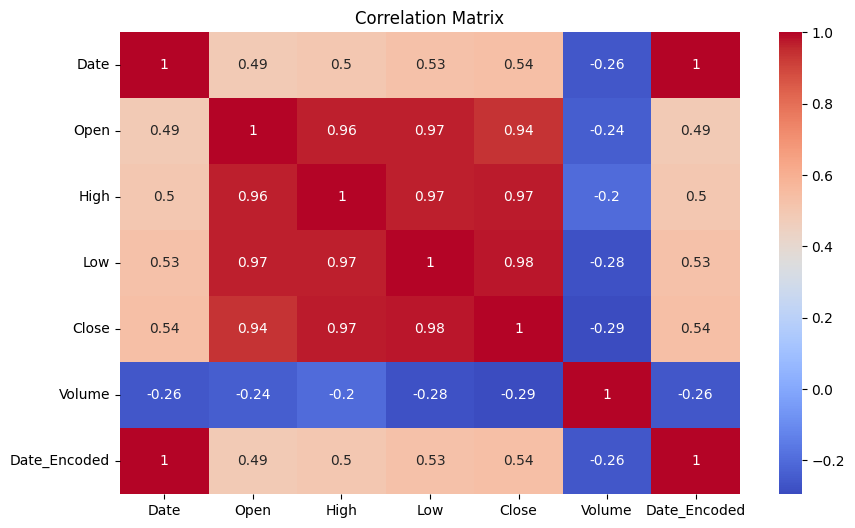

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [9]:
# Features and target variable
X = data[['Date_Encoded', 'Open', 'High', 'Low', 'Volume']]
y = data['Close']


In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Model Coefficients:
Intercept: -330.47184639160173
Coefficients: [ 4.58257161e-04 -4.37662804e-01  8.47858402e-01  5.58919574e-01
 -3.47914602e-08]


In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
print(y_pred)

[225.794608   216.14986426 202.9640885  231.02167718 223.09749331
 221.36041083 218.44258752 226.98540245 231.07388533 218.6661242
 229.13952403 225.35848834 212.70310186 228.97106226 231.24056974
 227.28675808 224.9576567  225.65102796 228.03408324 223.88791702
 220.88949026 211.95792967]


In [15]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Model Evaluation:
Mean Squared Error: 3.9258458342413136
R2 Score: 0.9100835658526262


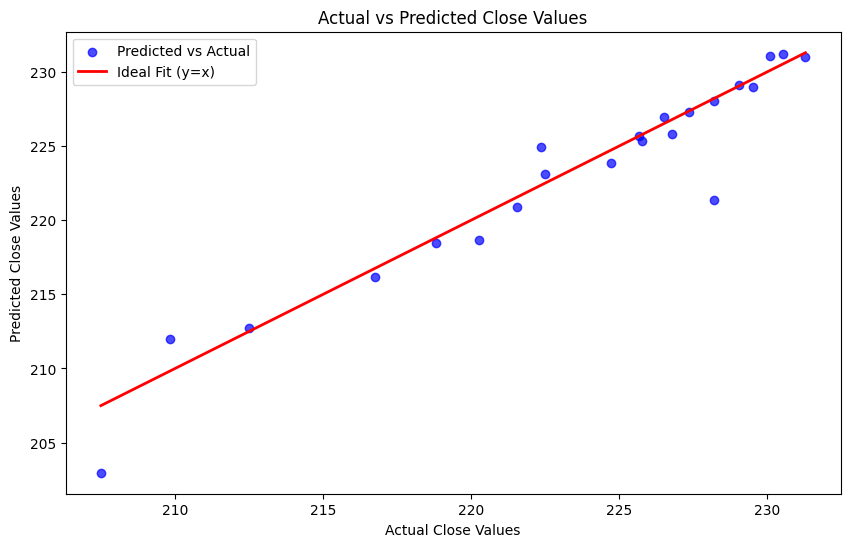

In [18]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual Close Values")
plt.ylabel("Predicted Close Values")
plt.title("Actual vs Predicted Close Values")
plt.legend()
plt.show()